In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

# import the world bank utility functions. It requires changing the path to import properly in Python
import sys
sys.path.append('../utility_functions')

from world_bank_utility_functions import (get_world_bank_indicator_name_from_code, 
                                          get_world_bank_indicator_definition_from_code)

# for displaying text with formatting later
from IPython.core.display import display, HTML

In [2]:
# Select data
# datasets = ["HEALTH_MERGED.csv", "Gender_WorldBankData.csv"]
datasets = ["HEALTH_MERGED.csv", "../WorldBankDatasets/Gender_WorldBankData.csv"]

# merged_worldbank_data = pd.read_csv('../WorldBankDatasets/Cleaned/AllMerged_Threshold_85_n3_MMRTNE.csv')
# merged_oecd_data = pd.read_csv('../OECD/Cleaned/HEALTH_MERGED_Threshold_80_n3.csv')

OECD = False  # False for WB data

if OECD:
    df = pd.read_csv(datasets[0])
    # df = merged_worldbank_data
    mm_ind = "MATIMATM"
else:
    df = pd.read_csv(datasets[1])
    # df = merged_oecd_data
    mm_ind = "SH.STA.MMRT"

In [3]:
# merged_worldbank_data_1

In [4]:
# merged_oecd_data

In [5]:
# mapping world bank codes to definitions
mapping_world_bank_to_names_and_definitions_df = pd.read_csv('../WorldBankDatasets/Cleaned/World_Bank_Indicator_Definition_Info.csv',
                                                             delimiter='\t')

In [6]:
# mapping_world_bank_to_names_and_definitions_df

## Data Preparation

In [7]:
# Encode the country

# Create a LabelEncoder instance for each categorical column
country_encoder = LabelEncoder()

# Encode the categorical columns
data_encoded = df.copy(deep=True)
data_encoded["Country"] = country_encoder.fit_transform(data_encoded["Country"])

data_encoded.dropna(axis=1, how="all", inplace=True)  # Drop features with no data
data_encoded.head()

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
0,0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,104690.5,110189.0,102966.0,108418.0,101791.5,106544.5,NaN,NaN,NaN,NaN
1,0,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,107486.0,112659.5,105340.0,110963.5,103665.5,109167.5,NaN,NaN,NaN,NaN
2,0,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109674.5,114825.5,108085.5,113334.5,105965.0,111613.0,NaN,NaN,NaN,NaN
3,0,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,111849.5,117375.5,110400.5,115626.5,108786.5,114060.5,NaN,NaN,NaN,NaN
4,0,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114769.0,120416.0,112826.0,118451.5,111326.5,116627.5,NaN,NaN,NaN,NaN


In [8]:
# Scale data
scaler = StandardScaler()
X = data_encoded.iloc[:, 2:]
X = scaler.fit_transform(X)

# Replace missing data using KNN imputation strategy
imputer = KNNImputer()
data_encoded.iloc[:, 2:] = imputer.fit_transform(X)

data_encoded.head()

,Country,Year,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
0,0,1960,0.917446,0.35814,-0.018794,0.221695,-0.467300,-0.495929,-0.878410,-0.399780,...,-0.281257,-0.280241,-0.287219,-0.285946,-0.291586,-0.292093,1.302065,1.381799,-1.403986,-1.272846
1,0,1961,0.760078,0.35814,-0.018794,0.221695,-0.467300,-0.495929,-0.878410,-0.058220,...,-0.272915,-0.273166,-0.280188,-0.278717,-0.286040,-0.284650,0.762504,0.888337,-0.843849,-0.800444
2,0,1962,0.917446,0.35814,0.093942,0.248867,-0.235419,-0.236195,-0.429548,-0.399780,...,-0.266384,-0.266964,-0.272057,-0.271984,-0.279236,-0.277712,1.302065,1.381799,-1.403986,-1.272846
3,0,1963,0.917446,0.35814,0.071869,0.236767,-0.267031,-0.218819,-0.424281,-0.434909,...,-0.259893,-0.259661,-0.265201,-0.265474,-0.270886,-0.270768,1.302065,1.381799,-1.403986,-1.272846
4,0,1964,0.917446,0.35814,0.071869,0.236767,-0.267031,-0.218819,-0.424281,-0.653799,...,-0.251181,-0.250954,-0.258018,-0.257452,-0.263369,-0.263484,0.417729,0.474173,-0.464110,-0.424922


In [9]:
# data_encoded

In [10]:
# Select year
data_2019 = data_encoded[data_encoded["Year"] == 2019]
data_2019.drop("Year", axis=1, inplace=True)

data_2019.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country,IC.FRM.FEMM.ZS,IC.FRM.FEMO.ZS,SE.ADT.1524.LT.FE.ZS,SE.ADT.1524.LT.FM.ZS,SE.ADT.1524.LT.MA.ZS,SE.ADT.LITR.FE.ZS,SE.ADT.LITR.MA.ZS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,...,SP.POP.AG03.FE.IN,SP.POP.AG03.MA.IN,SP.POP.AG04.FE.IN,SP.POP.AG04.MA.IN,SP.POP.AG05.FE.IN,SP.POP.AG05.MA.IN,SP.RUR.TOTL.FE.ZS,SP.RUR.TOTL.MA.ZS,SP.URB.TOTL.FE.ZS,SP.URB.TOTL.MA.ZS
59,0,-0.567529,0.220428,0.383290,0.180865,0.634648,0.315825,0.307156,0.268735,-0.733992,...,-0.127875,-0.123006,-0.127727,-0.124009,-0.128578,-0.125363,-0.872747,-0.826109,0.821245,0.870066
138,1,-0.315741,0.229035,0.375379,0.152915,0.671240,0.694272,0.808270,0.029399,-0.368432,...,-0.465942,-0.465638,-0.467946,-0.466861,-0.470445,-0.469508,-0.154461,-0.119288,0.111745,0.159819
217,2,-0.284268,0.683485,0.394934,0.162680,0.701201,0.704264,0.813057,0.743756,1.759276,...,-0.411464,-0.412693,-0.408237,-0.408720,-0.406034,-0.406368,-1.542344,-1.573807,1.552887,1.550930
296,3,-0.567529,0.220428,0.357284,0.176337,0.577636,0.605652,0.460106,0.069154,0.077306,...,-0.021349,-0.018654,-0.017131,-0.015161,-0.012554,-0.011240,-0.507654,-0.436491,0.432639,0.506360
375,4,-0.753508,0.471752,0.378886,0.179238,0.626763,0.565066,0.469040,0.102823,-0.636264,...,-0.465132,-0.465419,-0.465582,-0.465081,-0.467623,-0.467498,-0.224992,0.088664,0.198326,-0.050256


In [11]:
# Pull out Maternal Mortality as the predictor variable
X = data_2019.drop(columns=[mm_ind, 'Country'])
# X = data_2019.drop(columns=["Country"])
y = data_2019[mm_ind]

## Dimensionality Reduction

# PCA

In [12]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)

print("Number of PCs: {}".format(len(pca.explained_variance_ratio_)))
print("Explained variation per PC: {}".format(pca.explained_variance_ratio_))
print("Sum of explained variation: {}".format(pca.explained_variance_ratio_.sum()))

Number of PCs: 2
Explained variation per PC: [0.21624636 0.13629907]
Sum of explained variation: 0.35254542354131485


# Now to show you detailed information of the features that contribute to the PC analysis

In [13]:
def sort_loadings_for_princical_component(loadings, X=X):
    feature_names = X.columns
    
    # make a series of the current pca loadings. Index is the column name (feature) and value is the loading value
    feature_names_series = pd.Series(loadings, index=feature_names)

    # take the absolute value of the series
    feature_names_series_abs = feature_names_series.abs()

    # finally sort descending. The higher the number, the higher the correlatino and explanatory value of the feature for the principal component
    pca_component_explanatory_features_sorted = feature_names_series_abs.sort_values(ascending=False)
    
    return pca_component_explanatory_features_sorted

In [14]:
def get_most_important_features_from_pca_loadings (pca_loadings, n_most_important_features_from_loading = 5, 
                                                   includeName = True, includeDefintion = True):
    pca_loadings_explanations = {}

    cur_loadings_sorted_with_n_most_important_features = sort_loadings_for_princical_component(pca_loadings).iloc[
        0:n_most_important_features_from_loading]

    feature_codes = []
    feature_values = []

    feature_names = []
    feature_definitions = []

    for feature_code_index, feature_value in zip (cur_loadings_sorted_with_n_most_important_features.index,
                                                  cur_loadings_sorted_with_n_most_important_features.values):
        feature_codes.append(feature_code_index)
        feature_values.append(feature_value)

        if (includeName):
            cur_name = get_world_bank_indicator_name_from_code(feature_code_index)
            # print('cur_name is', cur_name)
            feature_names.append(cur_name)
        
        if (includeDefintion):
            cur_definition  = get_world_bank_indicator_definition_from_code(feature_code_index)
            feature_definitions.append(cur_definition)

    # pca_loadings_explanations[f"top_{n_most_important_features_from_loading}_most_important_feature_values"] = feature_values
    pca_loadings_explanations["most_important_features_values"] = feature_values
    pca_loadings_explanations["most_important_features_world_bank_codes"] = feature_codes
    pca_loadings_explanations["most_important_features_world_bank_names"] = feature_names
    pca_loadings_explanations["most_important_features_world_bank_definitions"] = feature_definitions

    return pca_loadings_explanations

In [15]:
# this function will show the top most important components explaining the variance for each of the pcs 
# give a given percentage of variance to explain
def pca_with_detailed_variance_and_components_info(percentage_of_variance_to_explain, X=X, n_most_important_features_from_loading=5, includeValues = False,
                                                 includeDefinition=False):
    pca = PCA(n_components=percentage_of_variance_to_explain, random_state=42)
    pca.fit(X)
    pca_loadings = pca.components_

    loadings_information = []
    for loading in pca_loadings:
        cur_loading_features_info = get_most_important_features_from_pca_loadings(loading, n_most_important_features_from_loading)
        loadings_information.append(cur_loading_features_info)
    
    num_principal_components = len(pca.explained_variance_ratio_)

    print(f'in order to explain {percentage_of_variance_to_explain * 100} percentage of the variance with pca it requires')
    print(f'{num_principal_components} principal components')
    print(f'the most important feature names, for the top {n_most_important_features_from_loading} from each PC, are\n')

    # print the most important value names
    most_important_feature_names_explaining_variance_with_pca = []
    for i in range(0, len(loadings_information)):
        # print('\n')
        print('---------')
        print(f'For Principal Component {i+1}, the most important features names are:\n')
        # print('\n')
        cur_loadings_info = loadings_information[i]

        cur_loadings_names = cur_loadings_info['most_important_features_world_bank_names']
        cur_loadings_values = cur_loadings_info['most_important_features_values']
        cur_loadings_codes = cur_loadings_info['most_important_features_world_bank_codes']
        cur_loadings_definitions = cur_loadings_info['most_important_features_world_bank_definitions']

        for code, value, name, definition in zip(cur_loadings_codes, cur_loadings_values, cur_loadings_names, cur_loadings_definitions):
            print(name)
            
            # uncomment for testing to debug
            # print(code)

            if (includeValues):
                print(f"with value {value}")

            if (includeDefinition):
                print(definition)
        print('\n')

## Modify variance_percentage_to_explain below for detailed information based on what percentage of the variance in principal components you want to explain maternal mortality. (see section below for just the top feature per PC)

In [16]:
# pca_with_detailed_variance_and_components_info(0.8)
# pca_with_detailed_variance_and_components_info(0.9, includeValues=True)
num_top_features_per_pc = 5
pca_with_detailed_variance_and_components_info(0.9, includeValues=True, 
                                               n_most_important_features_from_loading = num_top_features_per_pc)

in order to explain 90.0 percentage of the variance with pca it requires
19 principal components
the most important feature names, for the top 5 from each PC, are

---------
For Principal Component 1, the most important features names are:

Own-account workers, female (% of female employment) (modeled ILO estimate)
with value 0.14395529007681285
Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)
with value 0.14393792936445035
Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)
with value 0.14136541193391355
Prevalence of HIV, male (% ages 15-24)
with value 0.1407407639630906
Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)
with value 0.13136715075942498


---------
For Principal Component 2, the most important features names are:

Labor force, female
with value 0.2030690440719003
Age population, age 05, male, interpolated
with value 0.17952660818

In [17]:
# returns a list of the top feature name for each principal component
def get_top_feature_for_each_pc(percentage_of_variance_to_explain, X=X, n_most_important_features_from_loading=5):
    pca = PCA(n_components=percentage_of_variance_to_explain, random_state=42)
    pca.fit(X)
    pca_loadings = pca.components_

    loadings_information = []
    for loading in pca_loadings:
        cur_loading_features_info = get_most_important_features_from_pca_loadings(loading, n_most_important_features_from_loading)
        loadings_information.append(cur_loading_features_info)
    
    top_feature_name_per_pc = []
    for i in range(0, len(loadings_information)):
        cur_loadings_info = loadings_information[i]

        cur_features_names = cur_loadings_info['most_important_features_world_bank_names']
        cur_top_feature = cur_features_names[0]
        top_feature_name_per_pc.append(cur_top_feature)
        # cur_loadings_values = cur_loadings_info['most_important_features_values']
        # cur_loadings_codes = cur_loadings_info['most_important_features_world_bank_codes']
        # cur_loadings_definitions = cur_loadings_info['most_important_features_world_bank_definitions']
    
    return top_feature_name_per_pc

## Modify variance_percentage_to_explain below based on what percentage of the variance in principal components you want to explain maternal mortality. You may find the results interesting!

In [18]:
# below starts to use html formatting

In [19]:
# variance_percentage_to_explain = 0.2
# variance_percentage_to_explain = 0.3
# variance_percentage_to_explain = 0.5
# variance_percentage_to_explain = 0.8
# variance_percentage_to_explain = 0.85
# variance_percentage_to_explain = 0.9
variance_percentage_to_explain = 0.95

top_feature_names_for_pc_loadings = get_top_feature_for_each_pc(variance_percentage_to_explain)

# print(f"""Assuming you want to explain {variance_percentage_to_explain * 100} percent of the PC variation, 
# for maternal morality, the top feature names that explain this per principal component are:\n""")

display( HTML(f"""<h2>Assuming you want to explain {variance_percentage_to_explain * 100} percent of the PC variation, 
for maternal morality, the top feature names that explain this per principal component are:</h2>\n"""))

for i in range(0, len(top_feature_names_for_pc_loadings)):
    #print(f"for PC {i+1} the top explaining feature is: {top_feature_names_for_pc_loadings[i]}")
    # print(f"PC {i+1}: {top_feature_names_for_pc_loadings[i]}")
    display( HTML( f"<strong>PC {i+1}:</strong> {top_feature_names_for_pc_loadings[i]}" ) )
    # print("\n")

In [20]:
# Tune number of components to explain majority of variance
evs = 0
n = 2
while evs < 0.9:
    pca = PCA(n_components=n, random_state=42)
    pca.fit(X)

    evs = pca.explained_variance_ratio_.sum()
    n += 1

print("Number of PCs: {}".format(len(pca.explained_variance_ratio_)))
print("Explained variation per PC: {}".format(pca.explained_variance_ratio_))
print("Sum of explained variation: {}".format(pca.explained_variance_ratio_.sum()))

# Features do not appear to capture a high amount of variation, for both datasets
# may need to reexamine work or look into other methods of DR

Number of PCs: 19
Explained variation per PC: [0.21624636 0.13629907 0.11327478 0.080958   0.05217803 0.04427453
 0.03813262 0.03200316 0.02801746 0.02415366 0.02113282 0.01930922
 0.01836579 0.01637717 0.01557947 0.01473098 0.01406988 0.01159393
 0.01082633]
Sum of explained variation: 0.9075232744271639


## K-Means Clustering

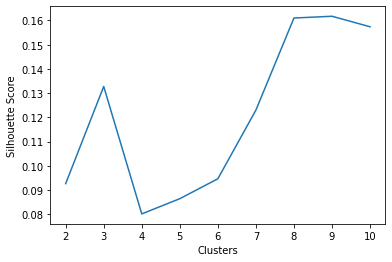

In [21]:
# Select number of clusters using "elbow" heuristic
# Evaluate using sklearn's shillouette score metric / higher is better
score = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), score)
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, n_init="auto", random_state=42)
kmeans.fit(X)
score.append(silhouette_score(X, kmeans.labels_))

In [23]:
# Produce mapping
# Source: https://gist.github.com/radcliff/f09c0f88344a7fcef373

mapping_name_to_iso = (
    pd.read_csv("wikipedia-iso-country-codes.csv")
    .set_index("Alpha-3 code")
    .to_dict()["Numeric code"]
)

iso_codes = [mapping_name_to_iso[c] for c in country_encoder.classes_]

FileNotFoundError: [Errno 2] No such file or directory: 'wikipedia-iso-country-codes.csv'

In [ ]:
# Plot clusters on a world map for visualization purposes
world_data = alt.topo_feature(data.world_110m.url, "countries")
ocean = alt.Chart(alt.sphere()).mark_geoshape(fill="lightblue")

countries = (
    alt.Chart(world_data)
    .mark_geoshape(stroke="black", strokeWidth=0.15)
    .encode(
        color=alt.Color(
            "Cluster:N",
        )
    )
    .transform_lookup(
        lookup="id",
        from_=alt.LookupData(
            pd.DataFrame({"ISO": iso_codes, "Cluster": kmeans.labels_}),
            "ISO",
            ["Cluster"],
        ),
    )
)

world_map = (
    (ocean + countries)
    .project("naturalEarth1")
    .properties(
        width=1000,
        height=500,
        title="Clustering of OECD countries, using World Bank Gender Indicators",
    )
)

world_map

## Association Mining

## Latent Variable Modeling